# Customizing styles

There are typically three question to ask yourse of considerations to make when you're creating a plot:
1. Are my data correctly represented and readable?
2. Is the plot sufficiently labeled and/or annotated to make it understandable?
3. If the plot is for more than personal consumption or exploration, is the content presented in such a way that it is sufficiently professional.

This third piece is what we focus on in this section: how to customize plots in matplotlib in ways that make the presentation of the plot professional and stand out amongst a sea of mediocre visualizations.

Before we start, let's take a simple plot with two subplots containing a line/scatter plot and a bar plot. In its initial state, it is a perfectly acceptable plot where all of our data are correctly represented in a form that suites them and all the content in our plot is fully labeled to be able to facilitate interpretation (satisfying questions 1 and 2 above with a resounding "yes"). The only style that was added was to change the color of the scattered data to distinguish it from the plot data (otherwise they are plotted in the same color).

You'll notice that we're making this into a function so we can run this again without having to rewrite the code for the plot since we won't be changing that; we'll only be changing the style.

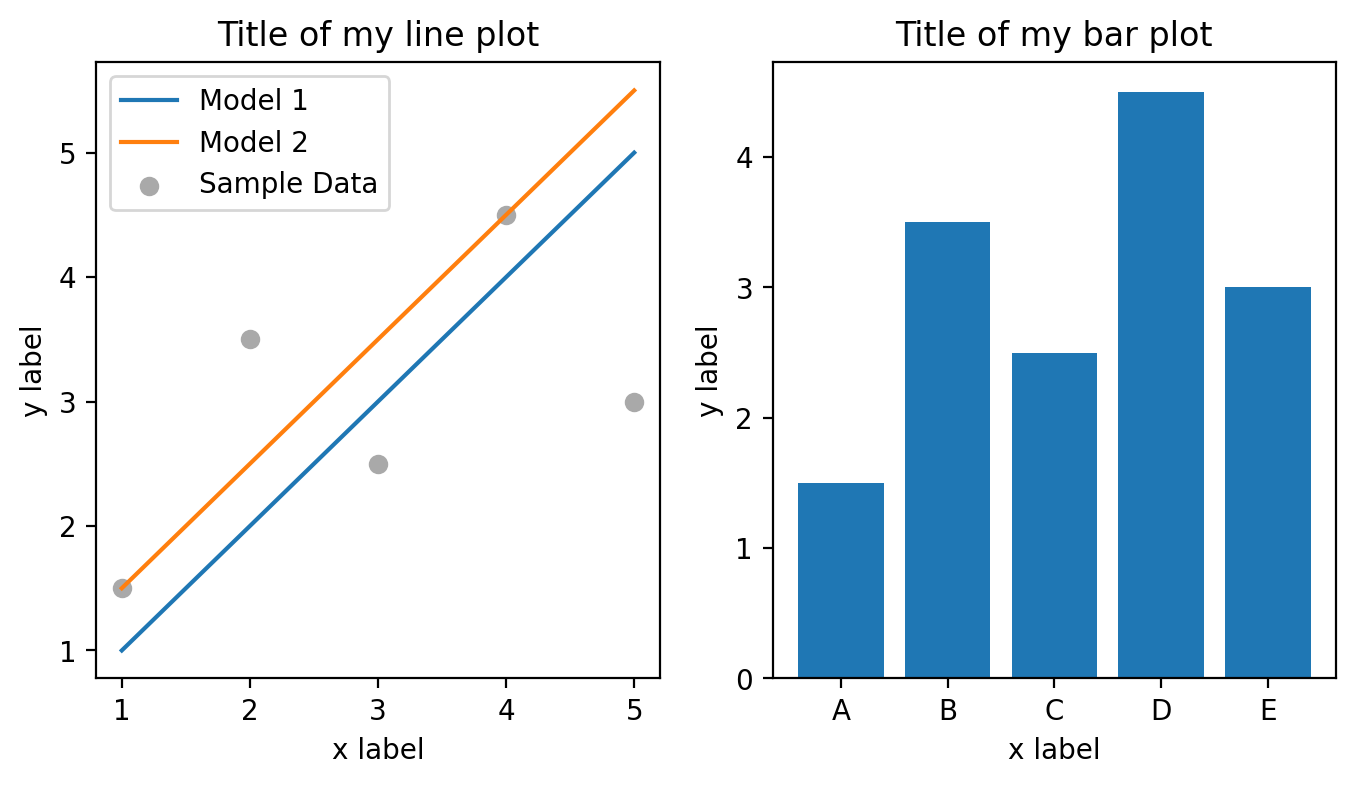

In [1]:
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y1 = [1.5,3.5,2.5,4.5,3]
y2 = [1,2,3,4,5]
y3 = [1.5,2.5,3.5,4.5,5.5]

y_bar = [1.5,3.5,2.5,4.5,3]
x_bar = ['A','B','C','D','E']

def myplot():
    fig, [ax_line,ax_bar] = plt.subplots(1,2, figsize=(8,4))
    
    ax_line.plot(x,y2, label='Model 1')
    ax_line.plot(x,y3, label='Model 2')
    ax_line.scatter(x,y1,label='Sample Data',color='darkgrey')
    ax_line.legend()
    ax_line.set_xlabel('x label')
    ax_line.set_ylabel('y label')
    ax_line.set_title('Title of my line plot')
    
    ax_bar.bar(x_bar,y_bar)
    ax_bar.set_xlabel('x label')
    ax_bar.set_ylabel('y label')
    ax_bar.set_title('Title of my bar plot')
    
myplot()

## Built in matplotlib styles

Matplotlib comes with several predetermined styles that you can choose from and are [listed in the documentation](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). A few of these are listed as:
- ggplot
- seaborn-v8_0
- fivethirtyeight

Let's see what happens when we use each of these and apply them to the plot above. We can do this using the `style.use()` method of the matplotlib.pyplot module and feeding in a name of a default style that's been composed into a stylesheet:

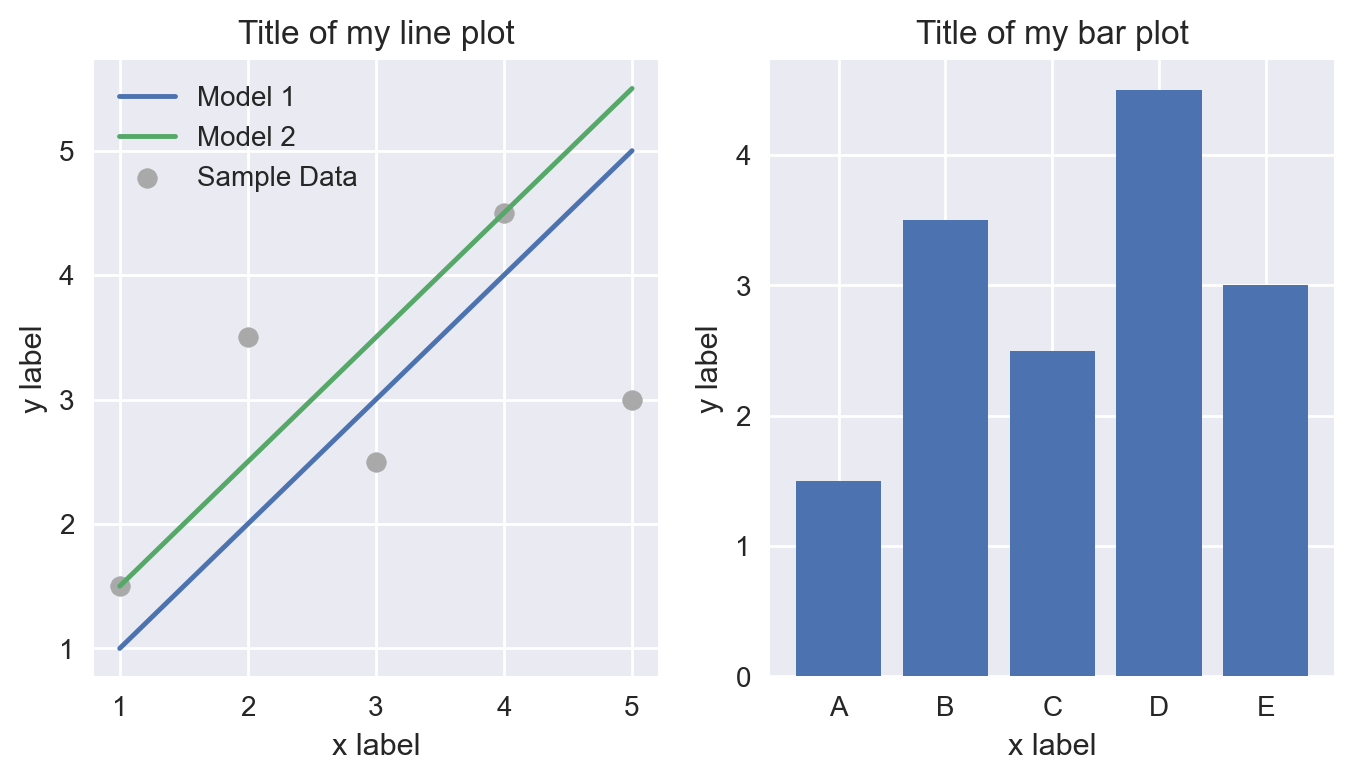

In [2]:
plt.style.use('seaborn-v0_8')
myplot()

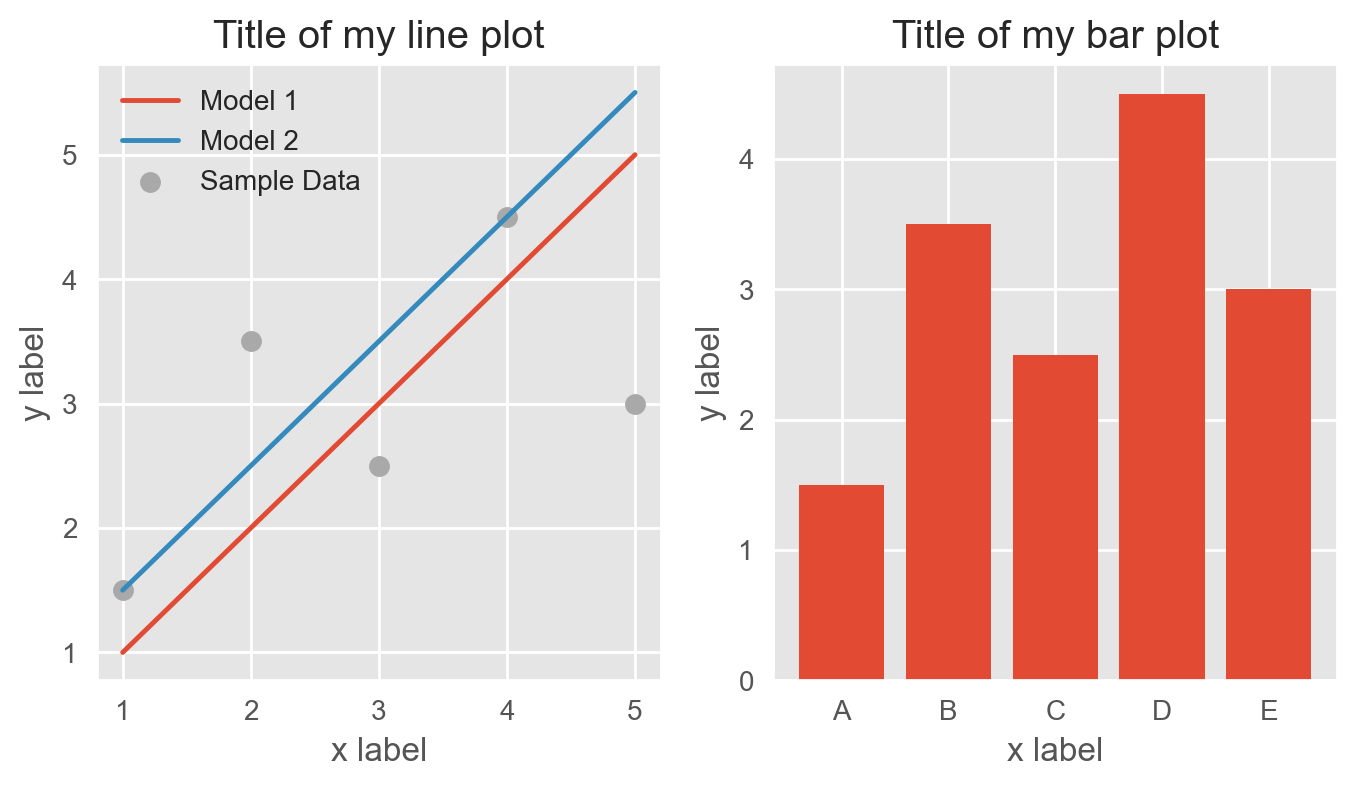

In [3]:
plt.style.use('ggplot')
myplot()

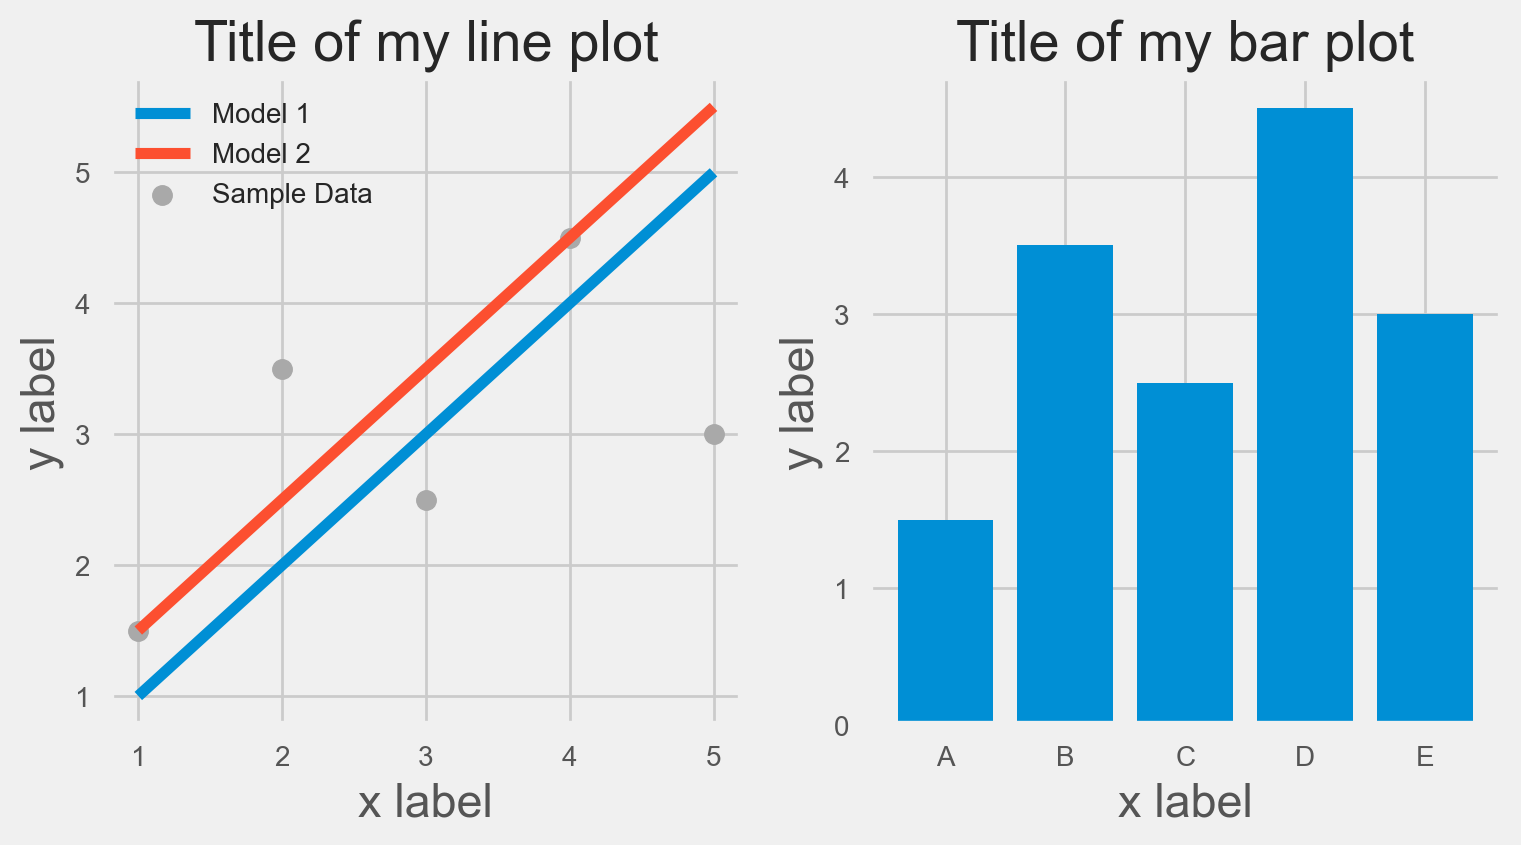

In [4]:
plt.style.use('fivethirtyeight')
myplot()

Once you set one of these styles, your plots will continue to follow that style while your current session is active or until you change the style. This doesn't permanently change the default plotting style, but just for your active session.

Each of these meet certain aesthetic goals and you likely have your personal preferences as to which of the four styles above are most aesthetically appealing.


## Customizing your own styles

While you can select from any of the predetermined styles in matplotlib, you're also welcome to customize your own. This is typically done by setting what are known as runtime configuration parameters or `rcParams`. Every parameter you could set is [listed in the matplotlib documentation](https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams).

There are a few high-level groupings of these parameters and the most common to change are:
- axes
- figure
- font
- legend
- lines
- text
- xtick
- ytick

Let's modify a few of these to understand how these changes can be made and how they're reflected in our plots.

Let's start again with our default style and begin modifying it:

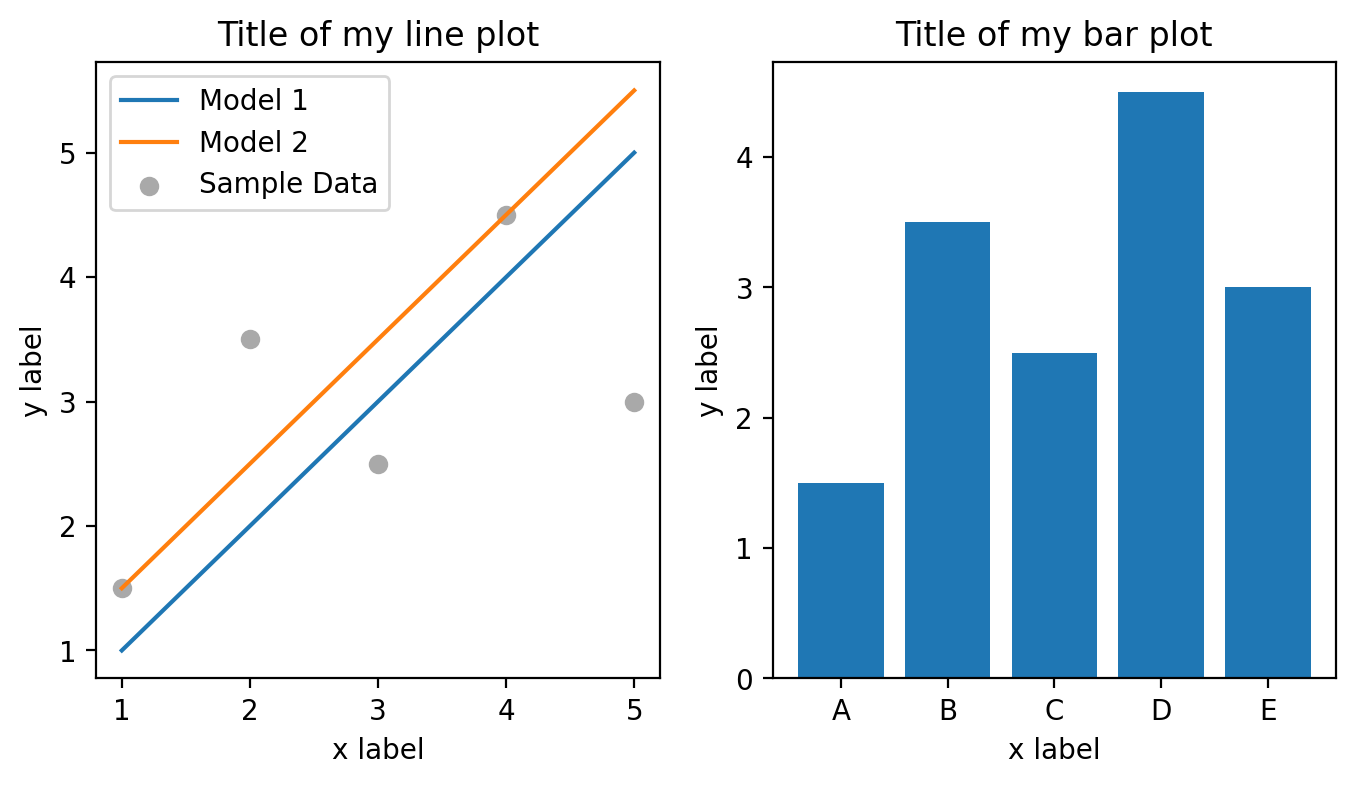

In [5]:
plt.style.use('default') # This resets the style to the default so we can modify it
myplot()

First, let's adjust the spines of the axes so that they're only present on the bottom and left, not the top and right. To modify an individual rcParam, we direclty set those params by setting them through `matplotlib.rcParams['param_name : param_value`. Here `matplotlib` means we need to import `matplotlib` directly and not just `pyplot`, which we typically do through `matplotlib.pyplot as plt`.

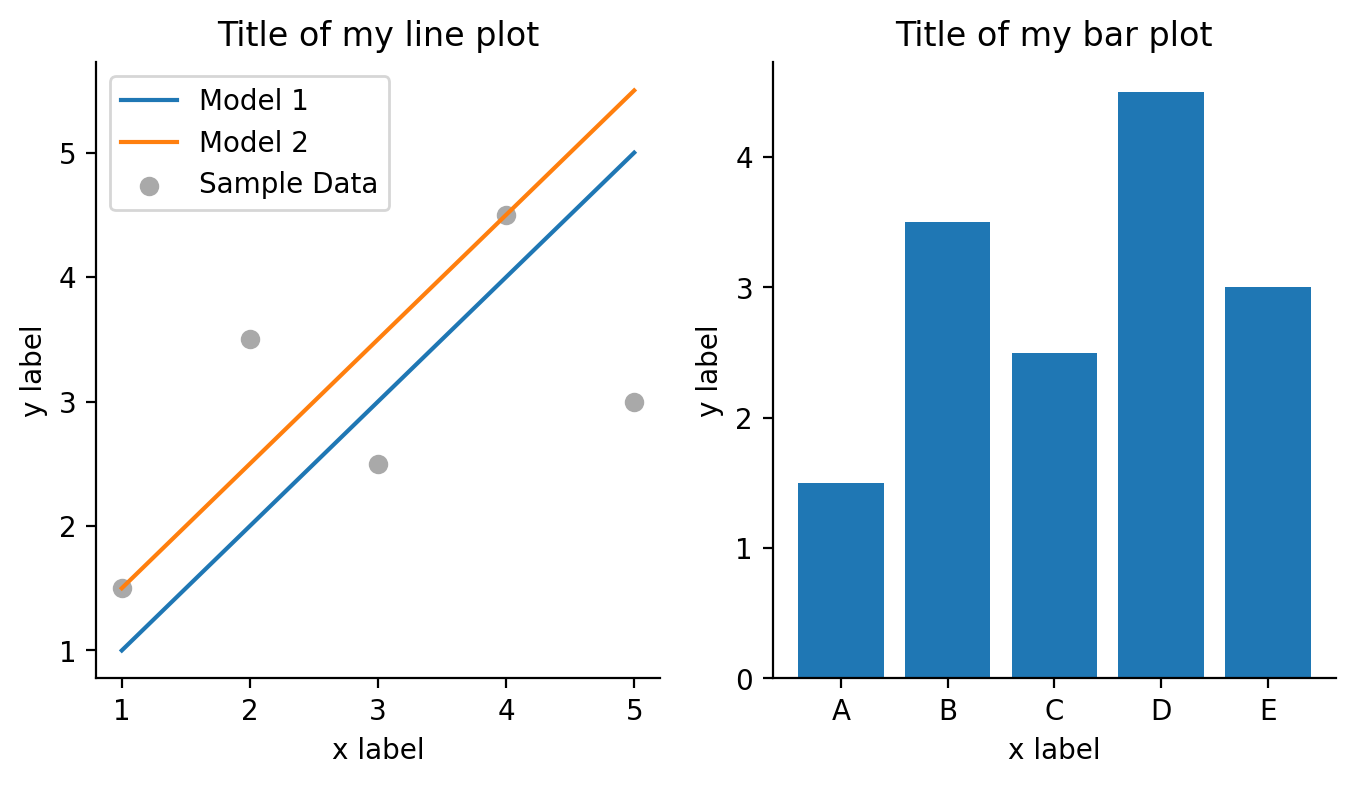

In [6]:
import matplotlib as mpl

# Edit the style
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False

myplot()

Let's also change the default positions of the titles and axes labels. Let's make the title left-justified and the axes labels at the top and right for the y- and x-axis, respectively:

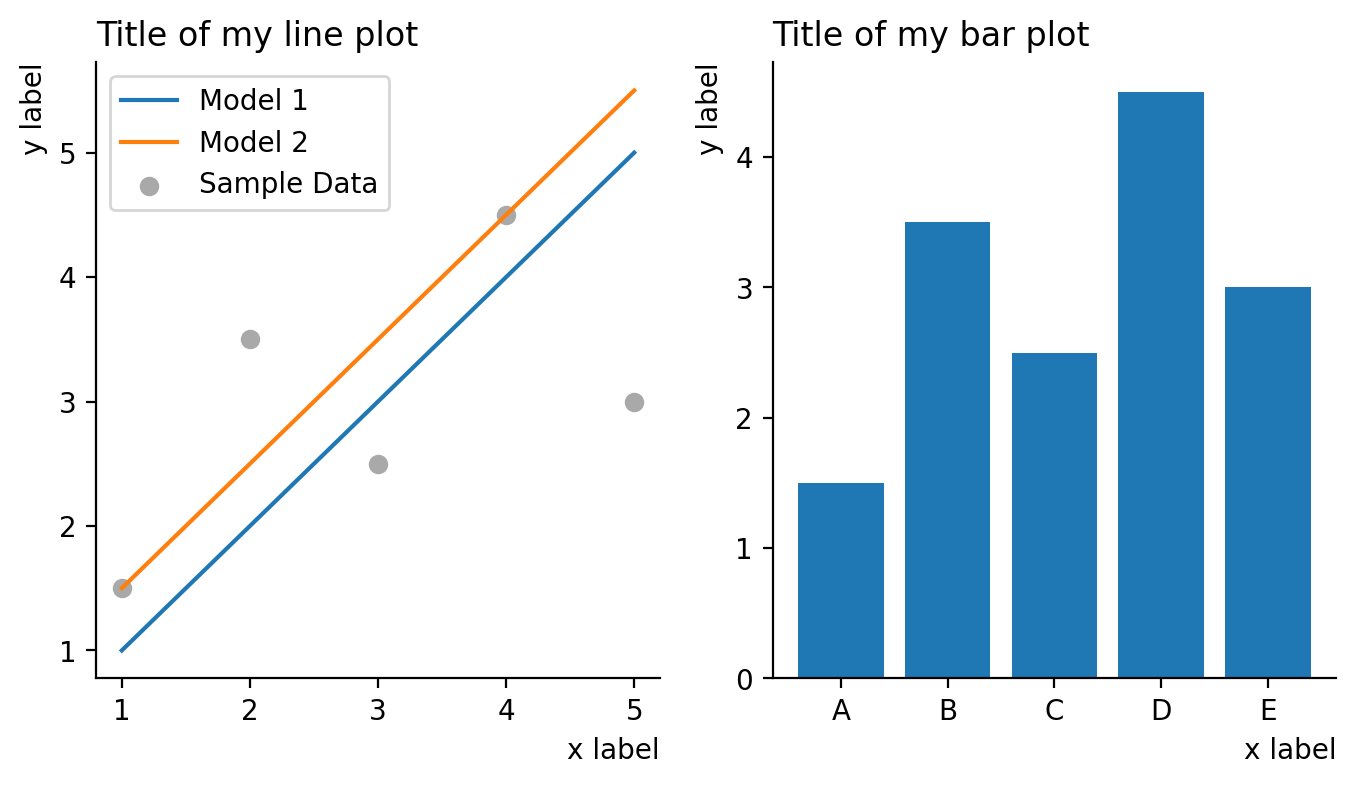

In [7]:
# Edit the style
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['xaxis.labellocation'] = 'right'
mpl.rcParams['yaxis.labellocation'] = 'top'

myplot()

Another way of making a plot a bit less cluttered is to remove the box from around the legend. This can be easily done by setting the `legend.frameon` parameter to `False`.

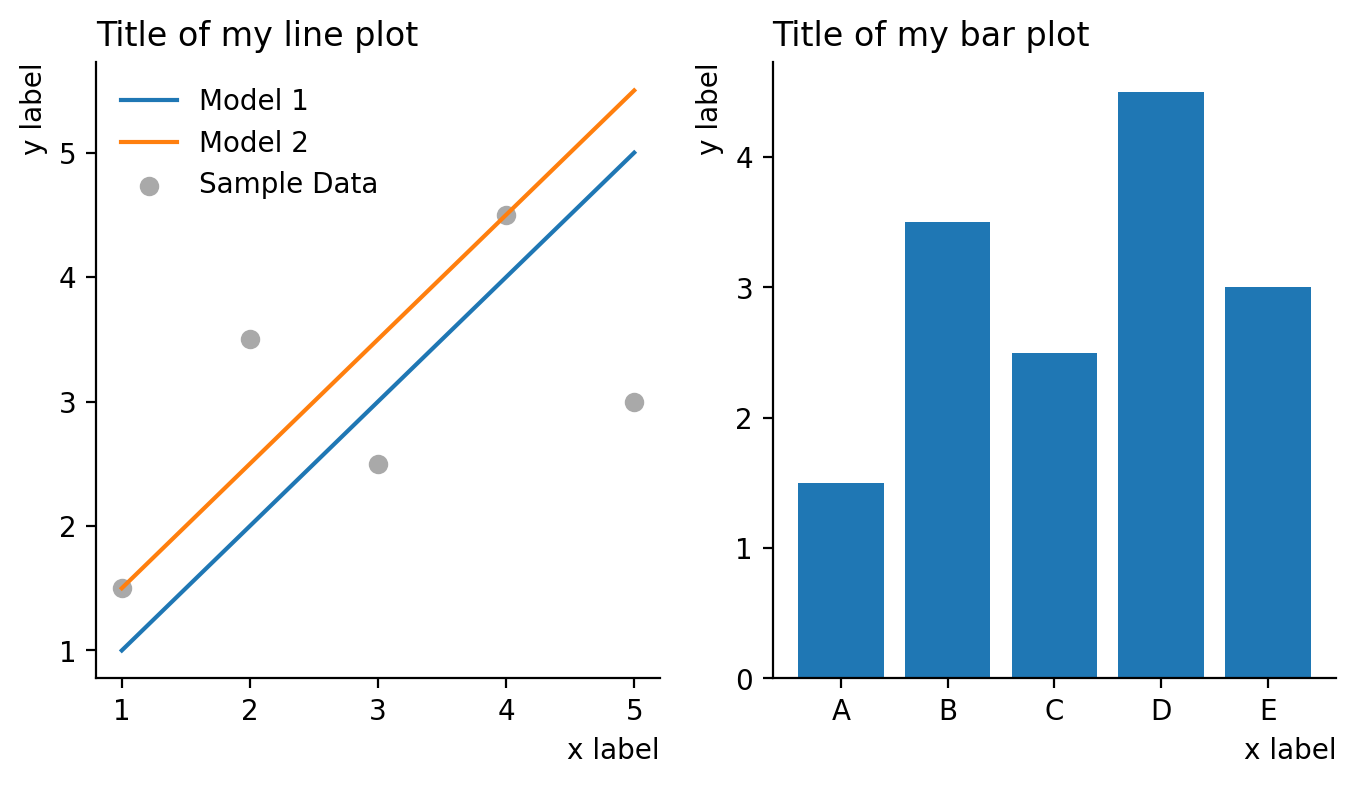

In [8]:
mpl.rcParams['legend.frameon'] = False

myplot()

Next, let's set the default font and fontsize. In matplotlib, the default font is set by selecting a font family, which has a list of options of individual fonts within that family (in case a particular font is not available on the machine you're using). The default font is DejaVu Sans, and is always good to have as a backup in case your preferred font is not available. For clean, company plots, a good option is Arial Narrow. Let's set that as the default font within the san-serif font family (sans serif fonts don't have serifs which are the little end strokes present in serif fonts like Times New Roman).

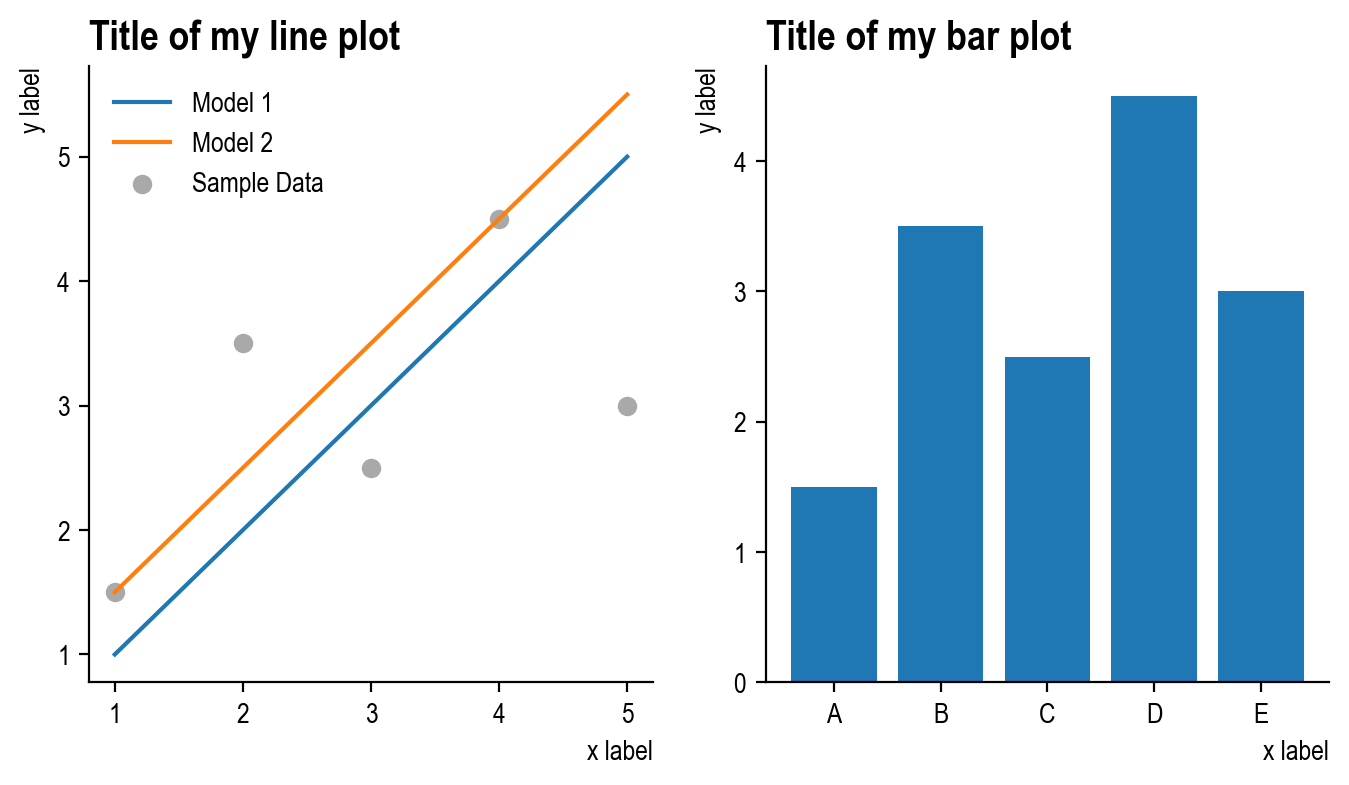

In [9]:
# Set the font
mpl.rcParams['font.sans-serif'] = ['Arial Narrow', 'DejaVu Sans']
mpl.rcParams['font.family'] = 'sans-serif'

# Adjust font sizes and weights
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.titlesize'] = 15 # This overrides the font size just for the title
mpl.rcParams['axes.titleweight'] = 'bold'

myplot()

 "axes": {
      "bottom": true,
      "top": false,
      "left": true,
      "right": false,
      "xmargin": 0.02,
      "ymargin": 0.02
    },
    "axis_labels": {
      "pad": -1,
      "size": "large"
    },
    "ticks": {
      "direction": "in",
      "draw_minor": true,
      "width_major": 2,
      "width_minor": 1,
      "size_major": 10,
      "size_minor": 6
    },
    "tick_labels": {
      "size": "large"
    },
    "title": {
      "location": "center",
      "pad": -2,
      "size": "x-large"
    },
    "grid": {
      "draw": true,
      "axis": "both",
      "ticks": "major",
      "alpha": 0.5,
      "width": 0.5
    },
    "fonts": {
      "family": "sans-serif",
      "sans-serif": ["Arial"]
    },
    "colors": {
      "figure_background_color": "white",
      "plot_background_color": "white",
      "text_color": "black",
      "line_color": "#333",
      "axes_color": "#555",
      "grid_color": "#555",
      "tick_color": "#555",
      "tick_label_color": "black",
      "palette": [
        "#56B4DF",
        "#D55E00",
        "#009E73",
        "#4EB67F",
        "#E69F00",
        "#CC79A7"
      ]

Next, let's make the spines and ticks a light grey color. We want to keep the actual tick labels (the numbers along the axes) black, so we'll need to set the `x`- and `ytick.color` parameters first, and then separately set the `x`- and `ytick.labelcolor` parameters so that the labels remain black.

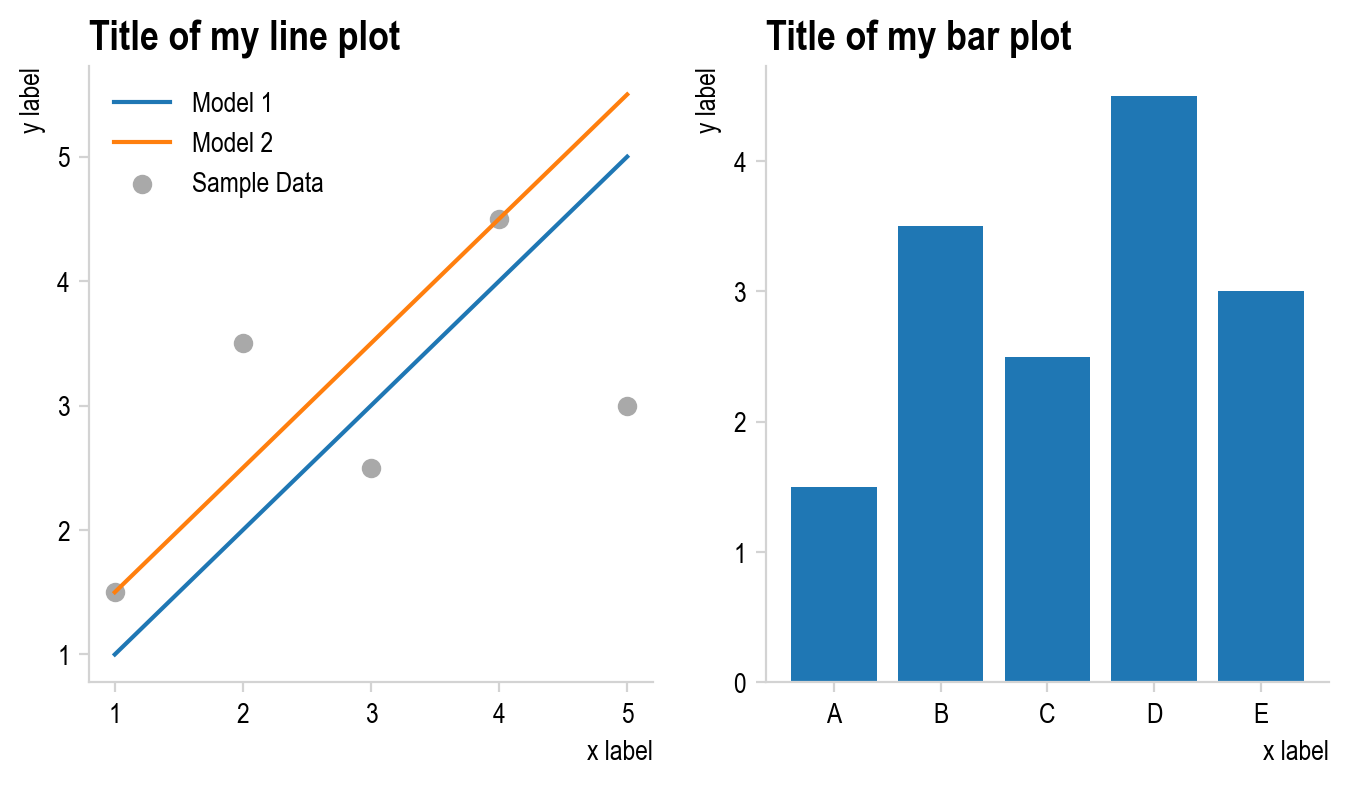

In [10]:
# Set the colors of axis elements
mpl.rcParams['axes.edgecolor'] = 'lightgrey'
mpl.rcParams['xtick.color'] = 'lightgrey'
mpl.rcParams['ytick.color'] = 'lightgrey'

# Since x and ytick.color over rides the label color, we need to reset the tick labels to still be black
mpl.rcParams['xtick.labelcolor'] = 'black' 
mpl.rcParams['ytick.labelcolor'] = 'black'

myplot()

It's a bit difficult to read exactly where the points are without a grid, so let's add in a grid, but just for the y-values. Let's also make the color of the grid light grey and make the linewidth very small, let's say 0.5 points so it's just a hairline. We'll need to turn on the grid and we'll also set the grid to appear BELOW the plot instead of being drawn over the plot elements.

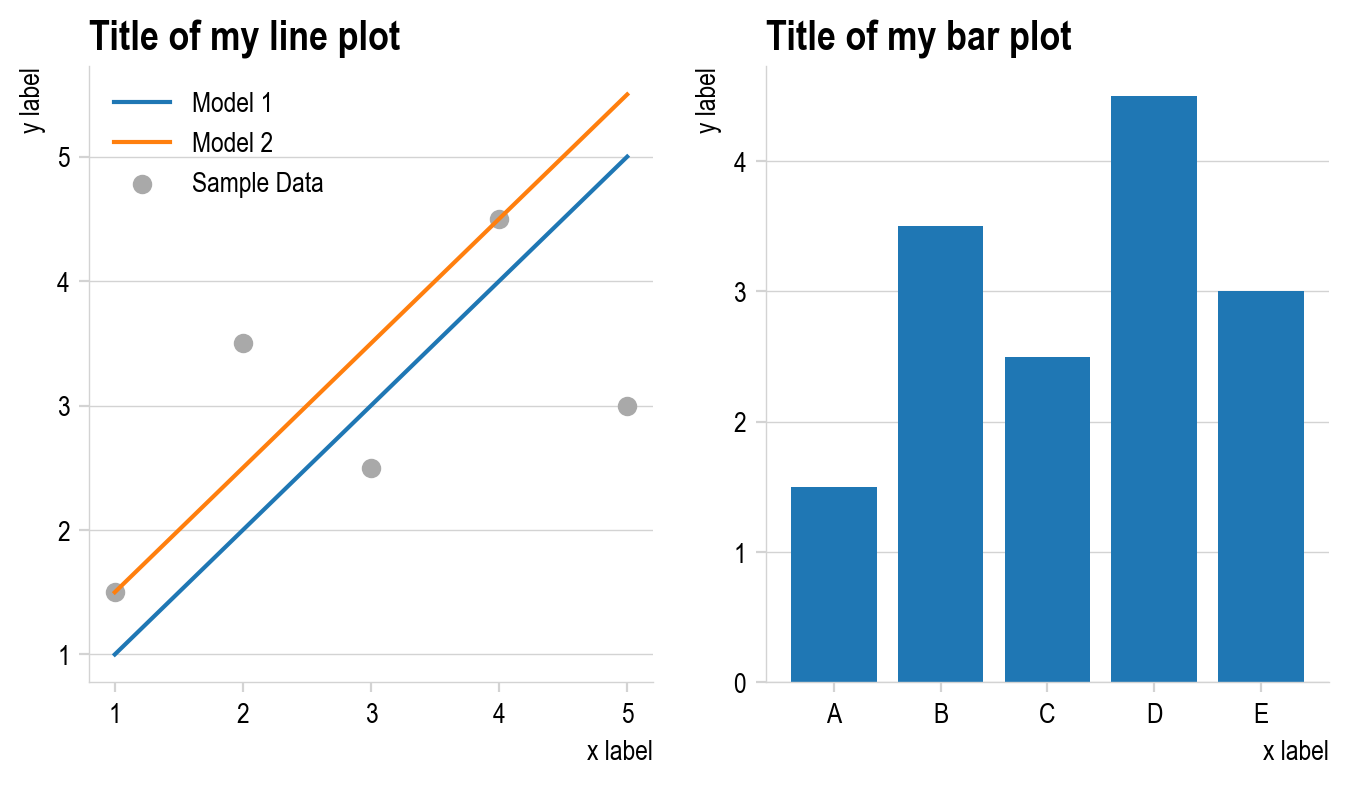

In [11]:
mpl.rcParams['axes.linewidth'] = 0.5
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.grid.axis'] = 'y'
mpl.rcParams['grid.color'] = 'lightgrey'
mpl.rcParams['axes.axisbelow'] = True

myplot()

Changing the default colors is also relatively simple. How matplotlib colors work is that are are a list of standard colors that matplotlib cycles through as new elements are placed on a plot of the same type. If you plot 3 lines, each will be in a different color, for example. That list is not infinite, so once you hit the maximum number of colors, the next line to be plotted cylces back around and is plotted with the first color on the list. You can enter your list of colors using the `mpl.cycle(color=[list_of_colors])` syntax as shown below:

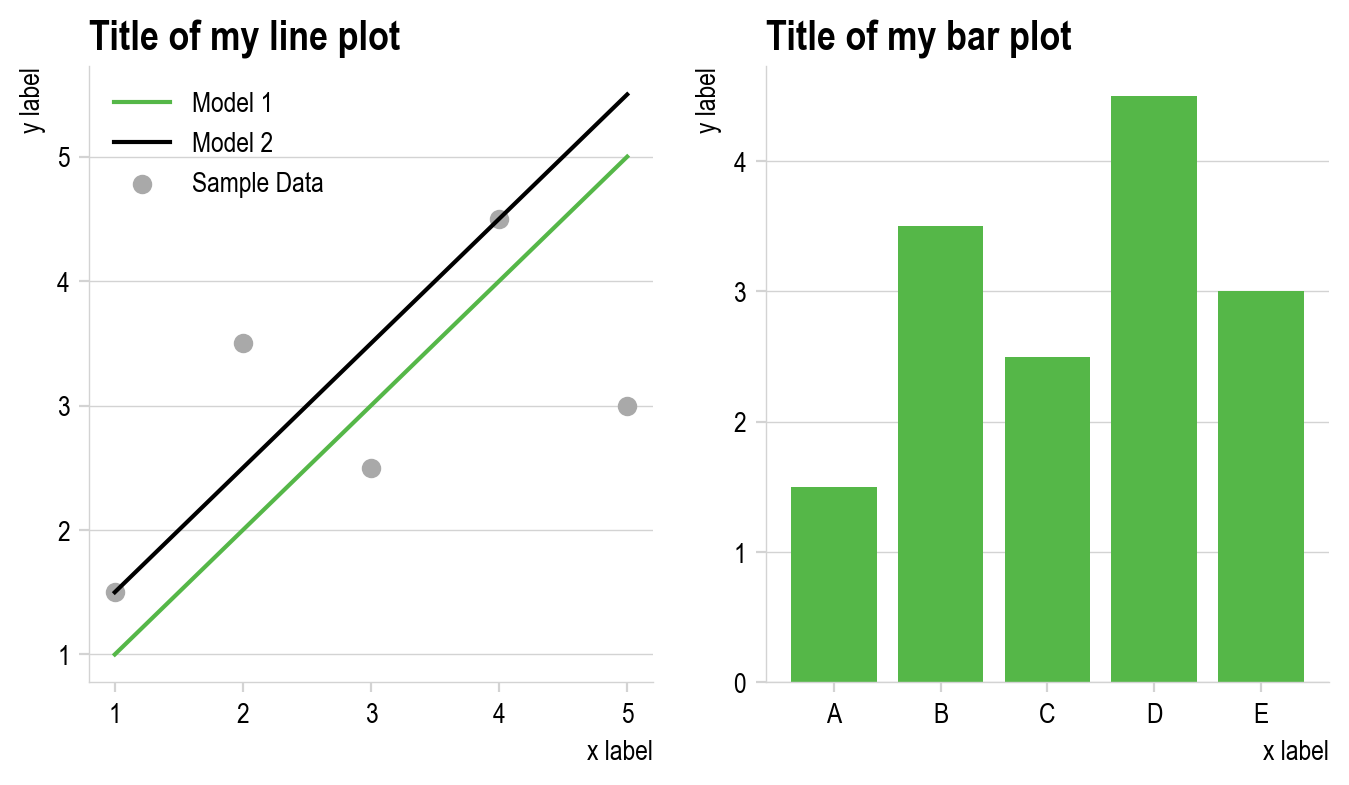

In [12]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["#55b748","#000000", "#ec008b", '#fdbf11', '#d2d2d2', '#000000']) # Enter a list of colors to cycle through

myplot()

Finally, notice the empty space between the x-axis and the first set of y-values at 1. Let's remove the margin of space between those to make the plot tighter. We'll also remove the y-axis spine since it's redundant now.

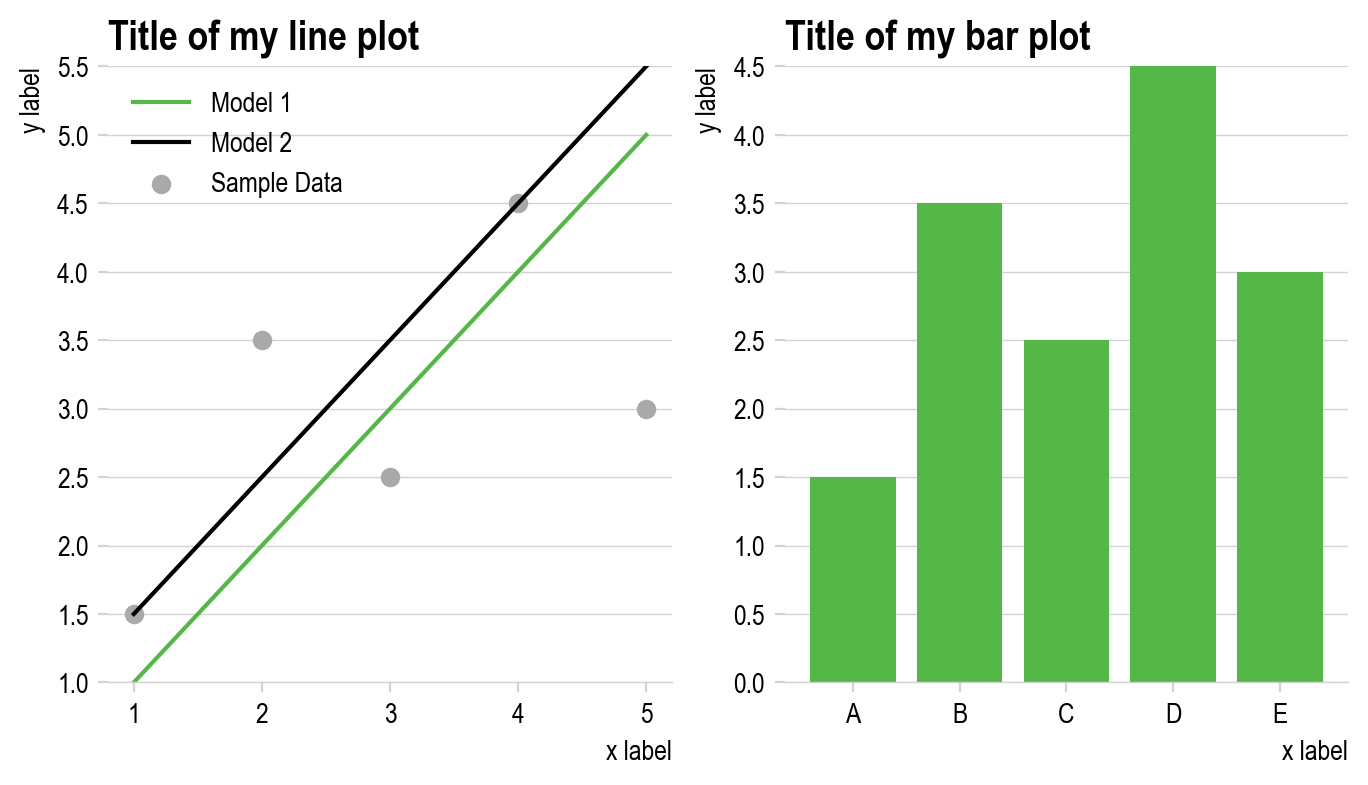

In [13]:
mpl.rcParams['axes.ymargin'] = 0
mpl.rcParams['axes.spines.left'] = False

myplot()

Whether or not you love or hate the style choices made above, hopefully what you can see is that matplotlib provides extensive flexibility in customizing the look and feel of your plots, only limited by your creativity and imagination. Go wild and try making some changes that you find interesting and visually appealing!

## Collecting your customizations into a stylesheet file

We made many changes above and while you can certainly include all the `mpl.rcParams[param_to_change] = param_value` statements into a header of each plot, you can alternatively collect them into a style sheet that you can simply activate with one line in each file of `plt.style.use(path_to_style_file)`. Let's do this for all the changes above. In this case, our file would be structure as follows, with each parameter being followed by a colon and the parameter value we want to set it to.

One thing to note for these files, no quotes are used around any entries

Contents of `mystyle.mplstyle`:
```
# Turn off all spines except for the bottom spine
axes.spines.bottom : True
axes.spines.top : False
axes.spines.left : False
axes.spines.right : False

# Adjust label alignments
axes.titlelocation : left
xaxis.labellocation : right
yaxis.labellocation : top

# Turn off the frame legend
legend.frameon : False

# Set the fonts, sizes, and weights
font.sans-serif : Arial Narrow, DejaVu Sans
font.family : sans-serif
font.size : 10
axes.titlesize : 15
axes.titleweight : bold

# Set the colors of axis elements
axes.edgecolor : lightgrey
xtick.color : lightgrey
ytick.color : lightgrey

# Since x and ytick.color over rides the label color, we need to reset the tick labels to still be black
xtick.labelcolor : black
ytick.labelcolor : black

# Turn on the grid and show the grid on the y-axis only
axes.grid : True
axes.grid.axis : y

# Set the default plotting colors
axes.prop_cycle : cycler('color', ['55b748','000000', 'ec008b', 'fdbf11', 'd2d2d2', '000000'])

# Make the grid and axes lines as thin as possible and lightgrey
axes.linewidth : 0.5
grid.linewidth : 0.5
grid.color : lightgrey

# Set the axis elements, including the grid, to be below the data that's plotted
axes.axisbelow : True

# Eliminate the vertical empty space between the x-axis and the first plotted y-values
axes.ymargin : 0
```

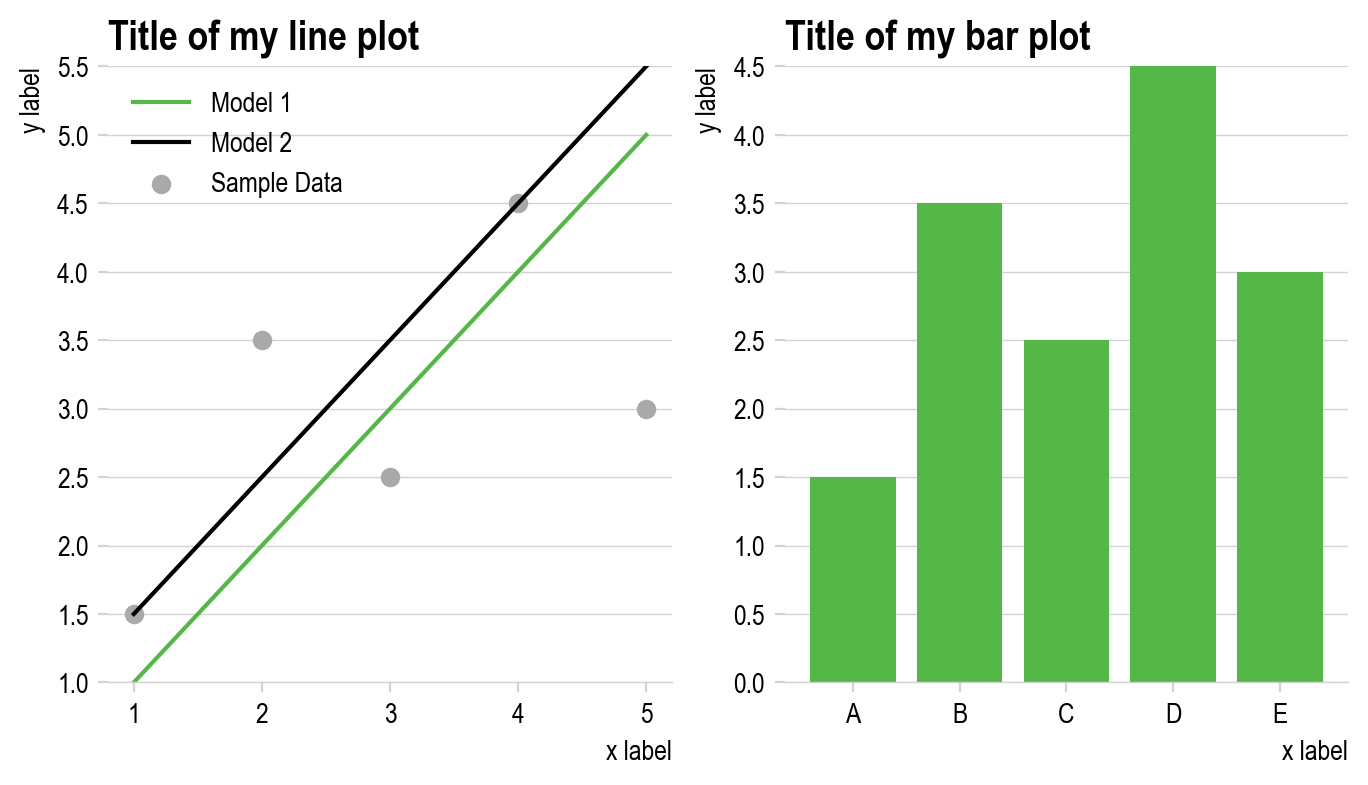

In [16]:
plt.style.use('default') # Resets to the original style
plt.style.use('mystyle.mplstyle') # If this file is not in your current directory, you'll need include the path to the file
myplot()

## What if I'm not an artist?

Most of us aren't artists and being able to determine what will look professional is not always intuitive. For that reason, following style guides that have been developed by others who consider these challenges is usually a good idea. For example, the style developed above closely follows many of the principles and aesthetic choices of the [Urban Institute's data visualization style guide](https://urbaninstitute.github.io/graphics-styleguide/). 

**One vital word of caution: good style does not imply effective communication. The clarity of communication of a message and accuracy of the implied interpretation of the data in a visualization should be first concerns.** 

As we'll reference later, there are numerous collections of best practices when it comes to data visualization, and below are an assortment of resources for learning more about evidence driven best practices for effective data visualization.

Rougier, N.P., Droettboom, M. and Bourne, P.E., 2014. Ten simple rules for better figures. PLoS computational biology, 10(9), p.e1003833.

Ajani, K., Lee, E., Xiong, C., Knaflic, C.N., Kemper, W. and Franconeri, S., 2021. Declutter and focus: Empirically evaluating design guidelines for effective data communication. IEEE Transactions on Visualization and Computer Graphics, 28(10), pp.3351-3364.

Franconeri, S.L., Padilla, L.M., Shah, P., Zacks, J.M. and Hullman, J., 2021. The science of visual data communication: What works. Psychological Science in the public interest, 22(3), pp.110-161.